In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df  = pd.read_csv("Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(10000, 10)

In [13]:
import math
N = 1000
d =10
ads_selected =[]
numbers_of_selections =[0]*d #(Ni(n))
sums_of_rewards = [0]*d 
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0 :
            
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            
            upper_bound = average_reward + delta_i
            
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        
        numbers_of_selections[ad]+=1
        reward = df.values[n,ad]
        sums_of_rewards[ad]=sums_of_rewards[ad]+reward
        total_reward = total_reward + reward    
            

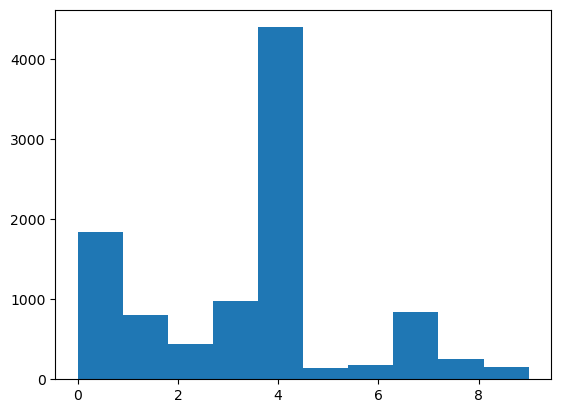

In [14]:
plt.hist(ads_selected);